#Variable Baseline Stereo

### How does baseline errors affect distance estimation?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact, fixed, FloatSliderWidget, interactive

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Considering a stereo camera set with these characteristics:

In [2]:
pixel_size_mm= 0.0053
focal_length_mm = 6

We can know how the disparity changes due to a delta (error) in the baseline distance

The error depends on the actual distance between the camera and the object

In [132]:
def get_min_discernable_x_delta(r_mm):
    return  pixel_size_mm/focal_length_mm*r_mm
                                
def plot_disparity_delta(r_mm, from_x_delta_mm=0, to_x_delta_mm=100):
    # min discernable x delta
    min_x_delta = get_min_discernable_x_delta(r_mm)
    x_delta = np.linspace(from_x_delta_mm, to_x_delta_mm, 1000)
    disparity_delta = np.floor(np.floor(x_delta/min_x_delta))
    plt.xlabel("baseline delta (mm)")
    plt.ylabel("disparity delta (pixels)")
    plt.plot(x_delta, disparity_delta)

For instance, considering a 1m distance:

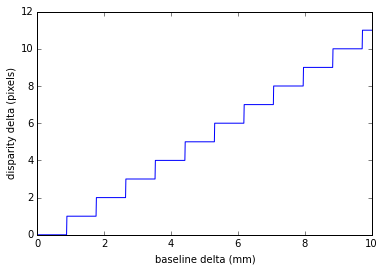

In [133]:
plot_disparity_delta(1000, to_x_delta_mm=10)

distant object are less affected:

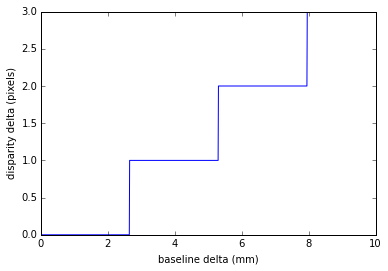

In [135]:
plot_disparity_delta(3000, to_x_delta_mm=10)

While disparity changes rapidly for close objects:

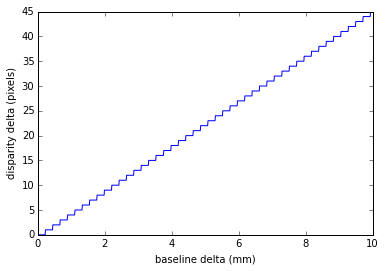

In [136]:
plot_disparity_delta(250, to_x_delta_mm=10)

#### Eventually this will affect the estimated distance

Now, we also have to consider the estimated baseline distance of the stereo set:

In [138]:
def plot_r_delta_due_to_baseline_delta(r_mm, baseline_mm, max_baseline_delta_mm=50):
    if max_baseline_delta_mm >= baseline_mm:
        raise Exception("max_baseline_delta_mm cannot be greater than the baseline delta")
    baseline_deltas = np.linspace(0,  max_baseline_delta_mm, 20)
    disparity_deltas = np.floor(baseline_deltas/get_min_discernable_x_delta(r_mm))
    expected_disparity = baseline_mm * focal_length_mm  / (pixel_size_mm * r_mm)
    r_deltas_min = (baseline_mm) * focal_length_mm /  (pixel_size_mm * (expected_disparity + disparity_deltas))
    r_deltas_max = (baseline_mm) * focal_length_mm /  (pixel_size_mm * (expected_disparity - disparity_deltas))
    y = np.repeat(r_mm, len(baseline_deltas))
    plt.hold(True)
    plt.scatter(baseline_deltas, y)
    plt.scatter(baseline_deltas, r_deltas_min, c='r')
    plt.scatter(baseline_deltas, r_deltas_max, c='g')
    #plt.errorbar(baseline_deltas, y, yerr=[r_deltas_min, r_deltas_max])
    plt.xlabel("baseline delta (mm)")
    plt.ylabel("r (mm)")

**Blue** is the actual object distance (is an input parameter). **Red** and **Green** are the lowest and greatest distance estimation that can arise due to the baseline estimation error.
So, for a** 9cm** baseline we get:

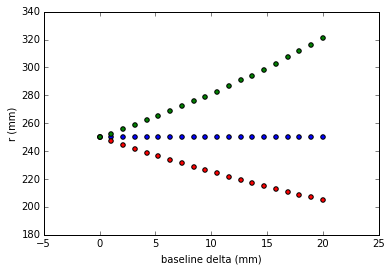

In [139]:
plot_r_delta_due_to_baseline_delta(r_mm=250, baseline_mm=90, max_baseline_delta_mm=20)

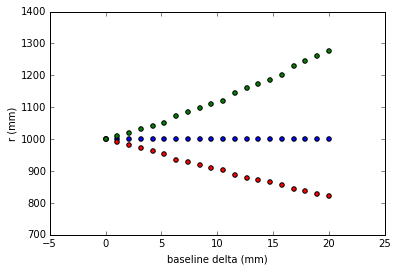

In [140]:
plot_r_delta_due_to_baseline_delta(r_mm=1000, baseline_mm=90, max_baseline_delta_mm=20)

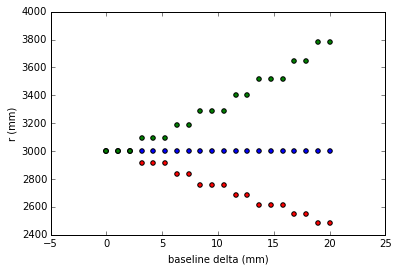

In [141]:
plot_r_delta_due_to_baseline_delta(r_mm=3000, baseline_mm=90, max_baseline_delta_mm=20)

This time, far objects have greater uncertanity. Remember that the farther the object is, the less will be the disparity.
Now let's see what happens with an estimated 18cm baseline:

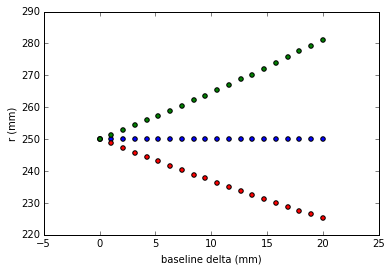

In [142]:
plot_r_delta_due_to_baseline_delta(r_mm=250, baseline_mm=180, max_baseline_delta_mm=20)

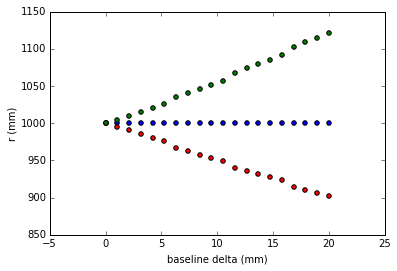

In [143]:
plot_r_delta_due_to_baseline_delta(r_mm=1000, baseline_mm=180, max_baseline_delta_mm=20)

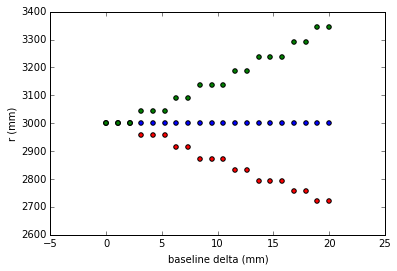

In [144]:
plot_r_delta_due_to_baseline_delta(r_mm=3000, baseline_mm=180, max_baseline_delta_mm=20)

The uncertanity is by far less than with a **9cm** baseline, as expected.